<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.linear_model import SGDClassifier
# import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Uploading ETL file
data = pd.read_csv('../Resources/chicago_crime_db.csv')
data.head(5)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn


In [3]:
data.shape

(6691918, 8)

In [4]:
# # Return a random sample of items from an axis of object - Do NOT run!
# data_ = data.sample(frac=0.05, random_state=42)
# # data_.reset_index(drop = True, inplace=True)
# data_.shape

In [5]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(data, columns = ['Location Description', 'Primary Type', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,...,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,False,True,41.815117,-87.670000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,False,41.895080,-87.765400,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,True,False,41.937406,-87.716650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,41.881903,-87.755121,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,False,False,41.744379,-87.658431,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# Split our preprocessed data into our features and target arrays
y = data_dummies.Arrest
X = data_dummies.drop('Arrest', axis=1)

In [7]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [8]:
# !pip install imblearn

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, InstanceHardnessThreshold

In [11]:
cc = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [12]:
# Tried but didn't work 
# cc = ClusterCentroids(random_state=42,n_jobs=-1)
# X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [13]:
# Tried but didn't work 
# cc = InstanceHardnessThreshold(random_state=42)
# X_test_resampled, y_test_resampled = cc.fit_resample(X_test, y_test)

In [14]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [15]:
# Train the Logistic Regression model on the scaled data and print the model score
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train_scaled, y_resampled)
print(f'Training Score: {round(model.score(X_train_scaled, y_resampled)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

Training Score: 76.4263%
Testing Score: 84.5048%


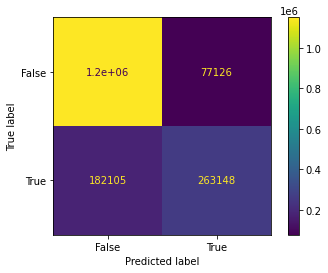

In [16]:
# Confusion Matrix Display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

In [17]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = model.predict(X_test)
print(classification_report(y_true, y_pred))

/Users/karlaflores/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/karlaflores/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karlaflores/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00   1227727
        True       0.27      1.00      0.42    445253

    accuracy                           0.27   1672980
   macro avg       0.13      0.50      0.21   1672980
weighted avg       0.07      0.27      0.11   1672980



/Users/karlaflores/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Making Predictions
predictions = model.predict(X_test)
result_df=pd.DataFrame({"Prediction": predictions, "Arrest": y_test})
result_df

/Users/karlaflores/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Arrest
4142123,True,True
2351674,True,False
1896399,True,False
4830558,True,False
6106353,True,False
...,...,...
3682108,True,True
5836679,True,False
639478,True,True
2873634,True,True


In [19]:
result_df['Prediction'].value_counts()

True    1672980
Name: Prediction, dtype: int64

In [20]:
result_df['Arrest'].value_counts()

False    1227727
True      445253
Name: Arrest, dtype: int64

In [21]:
comparison = np.where(result_df["Prediction"] == result_df["Arrest"], True, False)
comparison =pd.DataFrame({"Prediction": predictions, "Arrest": y_test, "Comparison": comparison})
comparison

,Prediction,Arrest,Comparison
4142123,True,True,True
2351674,True,False,False
1896399,True,False,False
4830558,True,False,False
6106353,True,False,False
...,...,...,...
3682108,True,True,True
5836679,True,False,False
639478,True,True,True
2873634,True,True,True


In [22]:
import pickle
pickle.dump(model,open('../Model- sav/logisticregression_undersampling.sav','wb'))

In [23]:
import pickle
filename = '../Model- sav/logisticregression_undersampling.sav.pickle'
pickle.dump(model, open(filename, 'wb'))